In [1]:
%%bash
nrnivmodl

/usr/bin/xcrun
/Users/anatolii-sorokin/Documents/Projects/neuro-trafic
Mod files: "./h.mod" "./kadist.mod" "./kaprox.mod" "./kdrca1.mod" "./km.mod" "./na3n.mod" "./naxn.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created arm64/special


In [2]:
# Download NEURON: http://www.neuron.yale.edu/neuron/download
# Download PyNeuronToolbox: https://github.com/ahwillia/PyNeuron-Toolbox

from neuron import h
import numpy as np
import math
import pylab as plt
import scipy.linalg
from PyNeuronToolbox.record import ez_record,ez_convert
#from PyNeuronToolbox import neuromorpho,morphology
from PyNeuronToolbox.morphology import shapeplot,shapeplot_animate,load
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
from matplotlib import animation
from matplotlib.pyplot import cm
%matplotlib inline
np.random.seed(123456789)

import re
import pandas as pd

DC = 10 # diffusion coeff [microns^2 s^-1]

cellname = 'dgyrus'
#cellname = 'granule'
#neuromorpho.download('041015-vehicle1', filename=cellname+'_morph.swc')
#cell = morphology.load(cellname+'_morph.swc',use_axon=False)
#cell = load(cellname+'_morph.swc',use_axon=False)


In [3]:
import sushibelt
import Edita_DG_10reg_10dv_model as model
import time
tnorm = np.sum(model.target ** 2)

2024-09-23 17:27:56,487 :: INFO :: function defined
2024-09-23 17:27:56,554 :: INFO :: data read


In [4]:
N=model.N

In [5]:
tdf=pd.read_csv('data/DG_seg_mapping.csv')
abbDG=tdf['abb']
abbT={}
segIdx={}
for i in range(N):
    abbT[abbDG[i]] = 1+ abbT.get(abbDG[i],0)
    ll=segIdx.get(abbDG[i],[])
    ll.append(i)
    segIdx[abbDG[i]] = ll


In [6]:
from PyNeuronToolbox.morphology import dist_between,allsec_preorder

def dist_to_soma(segment):
    return dist_between(h,allsec_preorder(h)[0](0.5),segment)

#seglist in pre-order
sec_list = allsec_preorder(h)
seg_list = []
for sec in sec_list:
    locs = np.linspace(0,1,sec.nseg+2)[1:-1]
    for loc in locs:
        seg_list.append(sec(loc))
n = len(seg_list)
N = n

In [7]:
soma = allsec_preorder(h)[0]
soma(0.5)

dgyrus_morph.soma[0](0.5)

In [8]:
(N,seg_list)

(32,
 [dgyrus_morph.soma[0](0.5),
  dgyrus_morph.dend[0](0.5),
  dgyrus_morph.dend[30](0.5),
  dgyrus_morph.dend[1](0.5),
  dgyrus_morph.dend[23](0.5),
  dgyrus_morph.dend[25](0.5),
  dgyrus_morph.dend[29](0.5),
  dgyrus_morph.dend[26](0.5),
  dgyrus_morph.dend[28](0.5),
  dgyrus_morph.dend[27](0.5),
  dgyrus_morph.dend[24](0.5),
  dgyrus_morph.dend[2](0.5),
  dgyrus_morph.dend[8](0.5),
  dgyrus_morph.dend[14](0.5),
  dgyrus_morph.dend[18](0.5),
  dgyrus_morph.dend[22](0.5),
  dgyrus_morph.dend[19](0.5),
  dgyrus_morph.dend[21](0.5),
  dgyrus_morph.dend[20](0.5),
  dgyrus_morph.dend[15](0.5),
  dgyrus_morph.dend[17](0.5),
  dgyrus_morph.dend[16](0.5),
  dgyrus_morph.dend[9](0.5),
  dgyrus_morph.dend[11](0.5),
  dgyrus_morph.dend[13](0.5),
  dgyrus_morph.dend[12](0.5),
  dgyrus_morph.dend[10](0.5),
  dgyrus_morph.dend[3](0.5),
  dgyrus_morph.dend[7](0.5),
  dgyrus_morph.dend[4](0.5),
  dgyrus_morph.dend[6](0.5),
  dgyrus_morph.dend[5](0.5)])

In [9]:
for i in range(len(sec_list)):
    sec = sec_list[i]
    print(f"{i}: {sec.name()}, nseg={sec.nseg}, propNseg={np.round(sec.L/3.7)}, L={sec.L}, or={sec.orientation()}, hname={sec.hname()}")

0: dgyrus_morph.soma[0], nseg=1, propNseg=3.0, L=9.91819953918457, or=0.0, hname=dgyrus_morph.soma[0]
1: dgyrus_morph.dend[0], nseg=1, propNseg=4.0, L=15.024203694066053, or=0.0, hname=dgyrus_morph.dend[0]
2: dgyrus_morph.dend[30], nseg=1, propNseg=21.0, L=78.86698101500725, or=0.0, hname=dgyrus_morph.dend[30]
3: dgyrus_morph.dend[1], nseg=1, propNseg=8.0, L=28.485078131788526, or=0.0, hname=dgyrus_morph.dend[1]
4: dgyrus_morph.dend[23], nseg=1, propNseg=8.0, L=28.605066572691324, or=0.0, hname=dgyrus_morph.dend[23]
5: dgyrus_morph.dend[25], nseg=1, propNseg=20.0, L=73.016644656963, or=0.0, hname=dgyrus_morph.dend[25]
6: dgyrus_morph.dend[29], nseg=1, propNseg=2.0, L=6.601848553352459, or=0.0, hname=dgyrus_morph.dend[29]
7: dgyrus_morph.dend[26], nseg=1, propNseg=1.0, L=4.393236653062116, or=0.0, hname=dgyrus_morph.dend[26]
8: dgyrus_morph.dend[28], nseg=1, propNseg=5.0, L=17.041471707253752, or=0.0, hname=dgyrus_morph.dend[28]
9: dgyrus_morph.dend[27], nseg=1, propNseg=2.0, L=7.143519

In [10]:
sec_list = allsec_preorder(h)
seg_list = []
for sec in sec_list:
    if sec.name() != 'dgyrus_morph.soma[0]':
        nseg = int(np.round(sec.L/3.7))
        locs = np.linspace(0,1,nseg+2)[1:-1]
        for loc in locs:
            seg_list.append(sec(loc))
    else:
        locs = np.linspace(0,1,3)[1:-1]
        for loc in locs:
            seg_list.append(sec(loc))
n = len(seg_list)
N = n
N

287

In [11]:
(dist_to_soma(seg_list[0]),dist_to_soma(seg_list[1]),sec.L,np.linspace(0,1,sec.nseg+2),np.linspace(0,1,sec.nseg+2)[1:-1])

(0.0,
 7.512101847033026,
 35.49684395804953,
 array([0. , 0.5, 1. ]),
 array([0.5]))

In [12]:
dts = [dist_to_soma(s) for s in seg_list]
max_dts = np.max(dts) + 0.01
dts_bounds = np.linspace(0,max_dts,11)
(dts_bounds,dts_bounds[0],dts_bounds[1])

(array([  0.        ,  19.34724756,  38.69449512,  58.04174268,
         77.38899025,  96.73623781, 116.08348537, 135.43073293,
        154.77798049, 174.12522805, 193.47247562]),
 0.0,
 19.34724756154288)

In [13]:
p = re.compile("^([^\\[]+)\\[.+")
tps = [p.sub("\\1",seg.sec.name()) for seg in seg_list]
pd.Series(tps).drop_duplicates().tolist()

['dgyrus_morph.soma', 'dgyrus_morph.dend']

In [14]:
seg_list = []
seg_abb = []
seg_name = []
seg_dts = [dist_to_soma(s) for s in seg_list]
for sec in sec_list:
    if sec.name() != 'dgyrus_morph.soma[0]':
        nseg = int(np.round(sec.L/3.7))
        locs = np.linspace(0,1,nseg+2)[1:-1]
        for loc in locs:
            seg_list.append(sec(loc))
            seg_name.append(sec.name())
            ldts = dist_to_soma(sec(loc))
            seg_dts.append(ldts)
            for j in range(len(dts_bounds)-1):
                print(f"ldts={ldts},j={j},dts_bounds[j]={dts_bounds[j]} and dts_bounds[j+1]={dts_bounds[j+1]}")
                if ldts >= dts_bounds[j] and ldts < dts_bounds[j+1]:
                    print(f"\trd{j+1},len(seg_abb)={len(seg_abb)}")
                    seg_abb.append(f"rd{j+1}")
                    break                    
    else:
        locs = np.linspace(0,1,3)[1:-1]
        for loc in locs:
            seg_list.append(sec(loc))
            seg_name.append(sec.name())
            ldts = dist_to_soma(sec(loc))
            seg_dts.append(ldts)
            for j in range(len(dts_bounds)-1):
                print(f"ldts={ldts},j={j},dts_bounds[j]={dts_bounds[j]} and dts_bounds[j+1]={dts_bounds[j+1]}")
                if ldts >= dts_bounds[j] and ldts < dts_bounds[j+1]:
                    print(f"\trd{j+1},len(seg_abb)={len(seg_abb)}")
                    seg_abb.append(f"rd{j+1}")
                    break
n = len(seg_list)
N = n
print([len(seg_abb),len(seg_name),len(seg_dts),len([i for i in range(N)])])

ldts=0.0,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
	rd1,len(seg_abb)=0
ldts=7.512101847033026,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
	rd1,len(seg_abb)=1
ldts=7.512101847033026,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
	rd1,len(seg_abb)=2
ldts=7.512101847033026,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
	rd1,len(seg_abb)=3
ldts=7.512101847033026,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
	rd1,len(seg_abb)=4
ldts=54.45769420156968,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
ldts=54.45769420156968,j=1,dts_bounds[j]=19.34724756154288 and dts_bounds[j+1]=38.69449512308576
ldts=54.45769420156968,j=2,dts_bounds[j]=38.69449512308576 and dts_bounds[j+1]=58.04174268462864
	rd3,len(seg_abb)=5
ldts=54.45769420156968,j=0,dts_bounds[j]=0.0 and dts_bounds[j+1]=19.34724756154288
ldts=54.45769420156968,j=1,dts_bounds[j]=19.34724756154288 and dts_bounds[j+1]=38.69449512308576
ldts=54.45769420156968

In [15]:
(len(seg_name),len(seg_abb),len(seg_dts),len(sec_list),seg_abb)

(287,
 287,
 287,
 32,
 ['rd1',
  'rd1',
  'rd1',
  'rd1',
  'rd1',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd2',
  'rd2',
  'rd2',
  'rd2',
  'rd2',
  'rd2',
  'rd2',
  'rd2',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd3',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd6',
  'rd8',
  'rd8',
  'rd8',
  'rd9',
  'rd9',
  'rd9',
  'rd9',
  'rd9',
  'rd8',
  'rd8',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd7',
  'rd3',
  'rd3',
  'rd3',
  'rd4',
  'rd4',
  'rd4',
  'rd5',
  'rd5',
  'rd5',
  'rd

In [16]:
tdf=pd.read_csv('data/DG_seg_mapping.csv')
tdf

,Unnamed: 0,N,Name,abb,DtS
0,0,0,dgyrus_morph.soma[0],rd1,0.000000
1,1,1,dgyrus_morph.dend[0],rd1,7.512102
2,2,2,dgyrus_morph.dend[0],rd1,7.512102
3,3,3,dgyrus_morph.dend[0],rd1,7.512102
4,4,4,dgyrus_morph.dend[0],rd1,7.512102
...,...,...,...,...,...
282,282,282,dgyrus_morph.dend[5],rd5,91.692424
283,283,283,dgyrus_morph.dend[5],rd5,91.692424
284,284,284,dgyrus_morph.dend[5],rd5,91.692424
285,285,285,dgyrus_morph.dend[5],rd5,91.692424


In [17]:
(N,tdf.shape,len(seg_list))

(287, (287, 5), 287)

In [18]:
abbDG=tdf['abb']
abbT={}
segIdx={}
for i in range(N):
    abbT[abbDG[i]] = 1+ abbT.get(abbDG[i],0)
    ll=segIdx.get(abbDG[i],[])
    ll.append(i)
    segIdx[abbDG[i]] = ll


In [19]:
#expD=pd.read_csv('data/DG_intensity_values_15072024.csv')
expD=pd.read_csv('data/DG_density_values_15072024.csv')
bgSignal=1e-5
#cname='D0W3'
cname0='D0M3'
d0w = -1 * np.ones(N)
for i in range(expD.shape[0]):
    abb = expD['Abbreviation'][i]
    sidx= segIdx[abb]
    d0w[sidx] *= -1*expD[f"{cname0}_MEAN"][i]/len(sidx)
for i in range(N):
    if d0w[i]<0:
        d0w[i] = bgSignal
dinit = d0w/np.sum(d0w)

#cname='D7W3'
cname7='D7M3'
d7w = -1*np.ones(N)
for i in range(expD.shape[0]):
    abb = expD['Abbreviation'][i]
    sidx= segIdx[abb]
    d7w[sidx] *= -1 * expD[f"{cname7}_MEAN"][i]/len(sidx)
for i in range(N):
    if d7w[i]<0:
        d7w[i] = bgSignal
target = np.array(expD[f"{cname7}_MEAN"])/np.sum(expD[f"{cname0}_MEAN"]) #norm target to Day0 sum to take into accound degradation
targSD = np.array(expD[f"{cname7}_SD"])/np.sum(expD[f"{cname0}_MEAN"]) #results to fit to
tnorm = np.sum(target ** 2)
day7 = 7 * 24 * 3600 # final time point


In [20]:
expD

,Abbreviation,D0W3_MEAN,D0W3_SD,D7W3_MEAN,D7W3_SD,D0M3_MEAN,D0M3_SD,D7M3_MEAN,D7M3_SD,D0M18_MEAN,D0M18_SD,D7M18_MEAN,D7M18_SD
0,rd1,135.666667,87.122519,0.00,0.577350,298.500000,52.851206,17.000000,2.645751,335.833333,69.527572,26.166667,11.729592
1,rd2,202.500000,111.196897,0.00,1.732051,343.500000,67.751384,31.666667,2.081666,413.333333,41.741267,40.333333,12.906717
2,rd3,252.500000,98.758544,0.00,2.598076,352.333333,72.016202,34.166667,3.013857,403.833333,39.001068,44.500000,11.302655
3,rd4,303.166667,94.167847,0.00,4.041452,357.333333,60.052755,43.166667,4.804512,404.833333,32.978528,58.666667,14.502873
4,rd5,324.500000,92.142553,0.00,6.639528,364.333333,62.081264,54.166667,6.171170,406.500000,30.647186,69.333333,14.571662
5,rd6,346.833333,91.763736,0.00,9.814955,368.500000,54.911292,62.333333,12.741010,413.166667,32.788463,77.000000,15.874508
6,rd7,384.833333,91.291201,0.00,10.969655,389.500000,59.095262,81.166667,13.041600,437.000000,16.370706,89.500000,22.765105
7,rd8,418.666667,74.790262,0.25,11.405408,418.500000,62.066497,92.500000,18.296174,461.000000,15.132746,108.333333,23.501773
8,rd9,439.500000,85.356605,0.50,12.423097,428.333333,54.500765,97.833333,20.027065,482.000000,16.462078,111.333333,25.662879
9,rd10,421.666667,76.002193,1.00,11.547005,396.666667,52.271726,96.000000,23.065125,441.333333,11.150486,93.666667,11.676187


In [21]:
parnames=['F','Ctau','mProp','demand_rd1','demand_rd2','demand_rd3','demand_rd4','demand_rd5','demand_rd6',
          'demand_rd7','demand_rd8','demand_rd9','demand_rd10','dv_rd1','dv_rd2','dv_rd3','dv_rd4','dv_rd5',
          'dv_rd6','dv_rd7','dv_rd8','dv_rd9','dv_rd10']
lowb=np.array([0,-18,0,1.0e-07,1.0e-07,1.0e-07,1.0e-07,1.0e-07,1.0e-07,1.0e-07,1.0e-07,1.0e-07,
               1.0e-07,-18,-18,-18,-18,-18,-18,-18,-18,-18,-18,])
upbga=np.array([1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
(len(parnames),len(lowb),len(upbga),parnames[3],parnames[13])

(23, 23, 23, 'demand_rd1', 'dv_rd1')

In [22]:
len(parnames)*21

483

In [23]:
dv = np.zeros(N)
utarg = np.ones(N)
for k in range(N):
    if model.itarg[k] > 2:
        utarg[k] = lowb[model.itarg[k]]
        dv[k] = (10 ** lowb[model.itarg[k]+10])
(dv,utarg)

(array([1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18,
        1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 1.e-18, 

In [24]:
(model.lowb[13],model.upbga[13])

(-18.0, 1.0)

In [25]:
#par = [0.8855702481960549,-17.6142146256606,0.12385432691434908,0.9642855946085199,0.5389253732509337,
#       0.272527645830006,0.9129387693392707,0.1297446952024372,0.6107997917511535,1e-07,0.9890938472884612,
#       0.24488136124301582,0.014607108124724532,-10.154176543644859,-11.575055132626284,-6.057936626299734,
#       -6.053467113877346,-6.0477171882104965,-6.028631654679405,-6.036945094549408,-5.999154504640609,
#       -6.00544599147668,-6.0530817424270875]
#cost = 0.0027400475307714973
#chi2=1184.7252031040346
#par = [0.8001576414106837,-8.83311346686456,0.9568695929329514,0.0020138669780257502,0.025377383988998158,0.029948781242701755,
#       0.9999999999999751,0.08896057016913292,0.0004002113170755411,0.014562289941884115,1.0523901851122988e-07,
#       1.0846600291496056e-07,0.9598262098965911,-6.028288531411434]
#cost = 2.283246533053875e-05
#chi2 = 8.532544224511733
#par = [0.0001347573108234385,-7.134175640871103,0.16358340428275822,0.9535886836265206,0.9392082944358957,0.588591654675706,
#       0.9999999999998962,0.761066612409874,0.012928172225454351,0.3308015862956901,1.742438941388552e-07,
#       1.397577721676662e-07,0.9832677483391569,-6.028282727752732]
#cost = 2.283438654048628e-05
#chi2 = 8.534658143069766
#par = [0.0,-17.641758850550943,0.9899980591588442,0.24988968936615671,1.0062994989967052e-07,1e-07,0.06556921170168392,1.0016863619144738e-07,1.0000000000227276e-07,0.00458126556189493,0.0001394007972908521,1e-07,0.999999999999629,-6.063004369056134,-6.070974912176686,-6.057936625641295,-6.053467103903037,-6.04771719102088,-6.0286316572292815,-6.036945095832321,-5.99915450387148,-6.005445989961027,-6.053081737997973]
#cost = 7.174089042842454e-32
#chi2 = 1.9756083405305166e-26
par =     [0.38045811693782183,-17.999999996173983,0.9829776349705306,0.8327241060440842,0.6817423197421232,1e-07,0.001178352727833331,0.001981887509234548,0.0005868862578329533,0.9999999999872324,0.0227100824137138,0.0012922112255617517,0.6751030453233307,-5.324402793151426,-5.404319648247094,-5.413636141175232,-5.456588887637485,-5.501488091825545,-5.5319379474387596,-5.586166243439893,-5.602787801258852,-5.61233822499455,-5.629706487668917]
opt_par = [0.38045811693782183,-17.999999996173983,0.9829776349705306,0.8327241060440842,0.6817423197421232,1e-07,0.001178352727833331,0.001981887509234548,0.0005868862578329533,0.9999999999872324,0.0227100824137138,0.0012922112255617517,0.6751030453233307,-5.324402793151426,-5.404319648247094,-5.413636141175232,-5.456588887637485,-5.501488091825545,-5.5319379474387596,-5.586166243439893,-5.602787801258852,-5.61233822499455,-5.629706487668917]
cost = 1.8904206110375962e-32
chi2 = 2.144032235335936e-26
mProp = par[2]
utrace = model.calcUtrace(par)
resM, resF = sushibelt.aggregate_segments(utrace[:, -1], model.segIdx, model.expD['Abbreviation'], fun=np.sum)


In [27]:
{'F' : par[0],
'Ctau' : par[1],
'mProp' : par[2],
'(1-mProp)' : (1-par[2]),
'demand_rd1' : par[3],
'demand_rd2' : par[4],
'demand_rd3' : par[5],
'demand_rd4' : par[6],
'demand_rd5' : par[7],
'demand_rd6' : par[8],
'demand_rd7' : par[9],
'demand_rd8' : par[10],
'demand_rd9' : par[11],
'demand_rd10' : par[12],
#'dv' : par[13],
'dv_rd1' : 10 ** par[13],
'dv_rd2' : 10 ** par[14],
'dv_rd3' : 10 ** par[15],
'dv_rd4' : 10 ** par[16],
'dv_rd5' : 10 ** par[17],
'dv_rd6' : 10 ** par[18],
'dv_rd7' : 10 ** par[19],
'dv_rd8' : 10 ** par[20],
'dv_rd9' : 10 ** par[21],
'dv_rd10' : 10 ** par[22],
'norm_factor' : (1-mProp),
'sum_resM' : np.sum(resM),
'sum_resF' : np.sum(resF),
'sum_tot' : np.sum(resF)+np.sum(resM),
'err' : np.sum((resF/(1-mProp) - model.target) ** 2),
'err_norm' : np.sum((resF/(1-mProp) - model.target) ** 2)/tnorm,
'chi2' : np.sum(((resF/(1-mProp) - model.target)/model.targSD) ** 2),
'cost' : cost,
'Chi2' : chi2
}

{'F': 0.38045811693782183,
 'Ctau': -17.999999996173983,
 'mProp': 0.9829776349705306,
 '(1-mProp)': 0.01702236502946941,
 'demand_rd1': 0.8327241060440842,
 'demand_rd2': 0.6817423197421232,
 'demand_rd3': 1e-07,
 'demand_rd4': 0.001178352727833331,
 'demand_rd5': 0.001981887509234548,
 'demand_rd6': 0.0005868862578329533,
 'demand_rd7': 0.9999999999872324,
 'demand_rd8': 0.0227100824137138,
 'demand_rd9': 0.0012922112255617517,
 'demand_rd10': 0.6751030453233307,
 'dv_rd1': 4.738023460840025e-06,
 'dv_rd2': 3.941670814980557e-06,
 'dv_rd3': 3.858014528934522e-06,
 'dv_rd4': 3.4947097558235008e-06,
 'dv_rd5': 3.1514607907668114e-06,
 'dv_rd6': 2.93806941715766e-06,
 'dv_rd7': 2.5931865271015507e-06,
 'dv_rd8': 2.4958138978639023e-06,
 'dv_rd9': 2.441528369739482e-06,
 'dv_rd10': 2.3458136676574714e-06,
 'norm_factor': 0.01702236502946941,
 'sum_resM': 0.9829776349181256,
 'sum_resF': 0.0027931789289645944,
 'sum_tot': 0.9857708138470902,
 'err': 1.8904206110375962e-32,
 'err_norm': 5.

In [31]:
(n,len(dv),len(utarg))

(287, 287, 287)

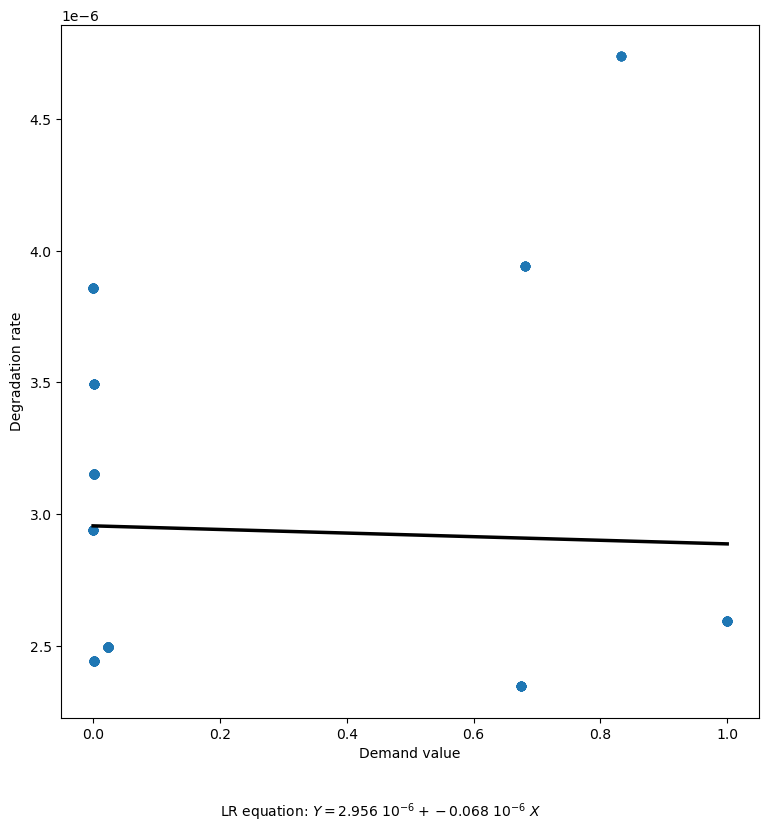

In [34]:
F = par[0]
Ctau = 10 ** par[1]
mProp = par[2]
dv = np.zeros(n)
utarg = bgSignal*np.ones(n)
for k in range(n):
    if model.itarg[k] > 2:
        dv[k] = (10 ** par[model.itarg[k]+10])
        utarg[k] = par[model.itarg[k]]
    else:
        dv[k] = np.nan
        utarg[k] = np.nan
#utarg /= np.sum(utarg)
bfit, afit = np.polyfit(utarg, np.array(dv), deg=1)
xseq = np.linspace(min(utarg), max(utarg), num=100)
#plt.scatter(utarg,dv)
fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(utarg, dv)
ax.plot(xseq, afit + bfit * xseq, color="k", lw=2.5)
pos = ax.get_position()
#ax.text(pos.x0, pos.y0 + pos.height, f'LR equation: $Y = {round(afit*1e6,3)}'+'\\ 10^{-6}'+f' + {round(bfit*1e6,3)}'+'\\ 10^{-6}\\ X$', fontsize=10)
ax.text(0.2,1.85e-6, f'LR equation: $Y = {round(afit*1e6,3)}'+'\\ 10^{-6}'+f' + {round(bfit*1e6,3)}'+'\\ 10^{-6}\\ X$', fontsize=10)
plt.xlabel('Demand value')
plt.ylabel('Degradation rate')
#plt.show()
plt.savefig('Edita_experiment_DG_density_10dv_degradation_fit.png')
plt.savefig('Edita_experiment_DG_density_10dv_degradation_fit.pdf')
plt.savefig('Edita_experiment_DG_density_10dv_degradation_fit.svg')


In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,target,label='Target')
ax.plot(x,resM,label='mobile DC')
ax.plot(x,resF,label='detached DC')
#ax.plot(x,resF/(1-mProp),label='norm detached DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
plt.show()
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.png')
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.pdf')
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.svg')

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,target,label='Target')
#ax.plot(x,resM,label='mobile DC')
#ax.plot(x,resF,label='detached DC')
ax.plot(x,resF/(1-mProp),label='norm detached DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('bestFit_DG_10reg_1dv_F08_202408281728best.png')
plt.savefig('bestFit_DG_10reg_1dv_F08_202408281728best.pdf')
plt.savefig('bestFit_DG_10reg_1dv_F08_202408281728best.svg')

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,expD[f"{cname0}_MEAN"],label=cname0)
#ax.plot(x,expD[f"{cname7}_MEAN"],label=cname7)
#ax.plot(x,resM,label='mobile DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
plt.show()
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.png')
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.pdf')
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.svg')

In [ ]:
#plt.plot(x,target,label=cname7)
plt.errorbar(x,target,targSD,label=cname7, fmt='-o')
#plt.plot(x,resF,label='detached DC')
plt.plot(x,resF/(1-mProp),label='detached norm DC')
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_20240828_3W_target_error.png')
plt.savefig('expEdita_DG_10reg_10dv_20240828_3W_target_error.pdf')
plt.savefig('expEdita_DG_10reg_10dv_20240828_3W_target_error.svg')

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
#ax.plot(x,expD[f"{cname0}_MEAN"],label=cname0)
ax.plot(x,expD[f"{cname7}_MEAN"],label=cname7)
#ax.plot(x,resM,label='mobile DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
plt.show()
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.png')
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.pdf')
#plt.savefig('bestFitEdita_20reg_1dv_soma_202407171015best.svg')

# Three weeks data

In [ ]:
#expD=pd.read_csv('data/DG_intensity_values_15072024.csv')
expD=pd.read_csv('data/DG_density_values_15072024.csv')
bgSignal=1e-5

cname0='D0W3'
d0w = -1 * np.ones(N)
for i in range(expD.shape[0]):
    abb = expD['Abbreviation'][i]
    sidx= segIdx[abb]
    d0w[sidx] *= -1*expD[f"{cname0}_MEAN"][i]/len(sidx)
for i in range(N):
    if d0w[i]<0:
        d0w[i] = bgSignal
dinit = d0w/np.sum(d0w)

cname7='D7W3'
d7w = -1*np.ones(N)
for i in range(expD.shape[0]):
    abb = expD['Abbreviation'][i]
    sidx= segIdx[abb]
    d7w[sidx] *= -1 * expD[f"{cname7}_MEAN"][i]/len(sidx)
for i in range(N):
    if d7w[i]<0:
        d7w[i] = bgSignal
target = np.array(expD[f"{cname7}_MEAN"])/np.sum(expD[f"{cname0}_MEAN"]) #norm target to Day0 sum to take into accound degradation
targSD = np.array(expD[f"{cname7}_SD"])/np.sum(expD[f"{cname0}_MEAN"]) #results to fit to
tnorm = np.sum(target ** 2)
day7 = 7 * 24 * 3600 # final time point


In [ ]:
model.dinit=dinit
utrace = model.calcUtrace(par)
resM, resF = sushibelt.aggregate_segments(utrace[:, -1], model.segIdx, model.expD['Abbreviation'], fun=np.sum)

In [ ]:
{'F' : par[0],
'Ctau' : par[1],
'mProp' : par[2],
'(1-mProp)' : (1-par[2]),
'demand_rd1' : par[3],
'demand_rd2' : par[4],
'demand_rd3' : par[5],
'demand_rd4' : par[6],
'demand_rd5' : par[7],
'demand_rd6' : par[8],
'demand_rd7' : par[9],
'demand_rd8' : par[10],
'demand_rd9' : par[11],
'demand_rd10' : par[12],
#'dv' : par[13],
'dv_rd1' : par[13],
'dv_rd2' : par[14],
'dv_rd3' : par[15],
'dv_rd4' : par[16],
'dv_rd5' : par[17],
'dv_rd6' : par[18],
'dv_rd7' : par[19],
'dv_rd8' : par[20],
'dv_rd9' : par[21],
'dv_rd10' : par[22],
'norm_factor' : (1-mProp),
'sum_resM' : np.sum(resM),
'sum_resF' : np.sum(resF),
'sum_tot' : np.sum(resF)+np.sum(resM),
'err' : np.sum((resF/(1-mProp) - target) ** 2),
'err_norm' : np.sum((resF/(1-mProp) - target) ** 2)/tnorm,
'chi2' : np.sum(((resF/(1-mProp) - target)/targSD) ** 2),
'cost' : cost,
'Chi2' : chi2
}

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,target,label='Target')
#ax.plot(x,resM,label='mobile DC')
ax.plot(x,resF,label='detached DC')
ax.plot(x,resF/(1-mProp),label='norm detached DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target.png')
plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target.pdf')
plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target.svg')

In [ ]:
#plt.plot(x,target,label=cname7)
plt.errorbar(x,target,targSD,label=cname7, fmt='-o')
#plt.plot(x,resF,label='detached DC')
plt.plot(x,resF/(1-mProp),label='detached norm DC')
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target_error.png')
plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target_error.pdf')
plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target_error.svg')

In [ ]:
#plt.plot(x,target,label=cname7)
plt.errorbar(x,target,targSD,label=cname7, fmt='-o')
plt.plot(x,resF,label='detached DC')
#plt.plot(x,resF/(1-mProp),label='detached norm DC')
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
plt.show()
#plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target_error.png')
#plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target_error.pdf')
#plt.savefig('expEdita_DG_10reg_10dv_3W_density_20240922_target_error.svg')

## Degradation adjusted

In [ ]:
par_dev = par.copy()
dv_val = [-2.372770811153945,-1.2890811921179512,-4.893397765300463,-1.23886467075058,0.9970473115280463,-0.4719839734855036,0.9999889207762749,-5.58412402098368,-5.812258408904807,-6.486561845484665]
par_dev[13:] = [-2.372770811153945,-1.2890811921179512,-4.893397765300463,-1.23886467075058,0.9970473115280463,-0.4719839734855036,0.9999889207762749,-5.58412402098368,-5.812258408904807,-6.486561845484665]
cost = 1.3329819218418034e-14
chi2 = 1.5470576015145376e-08

In [ ]:
model.dinit=dinit
utrace = model.calcUtrace(par_dev)
resM, resF = sushibelt.aggregate_segments(utrace[:, -1], model.segIdx, model.expD['Abbreviation'], fun=np.sum)

In [ ]:
{'F' : par_dev[0],
'Ctau' : par_dev[1],
'mProp' : par_dev[2],
'(1-mProp)' : (1-par_dev[2]),
'demand_rd1' : par_dev[3],
'demand_rd2' : par_dev[4],
'demand_rd3' : par_dev[5],
'demand_rd4' : par_dev[6],
'demand_rd5' : par_dev[7],
'demand_rd6' : par_dev[8],
'demand_rd7' : par_dev[9],
'demand_rd8' : par_dev[10],
'demand_rd9' : par_dev[11],
'demand_rd10' : par_dev[12],
#'dv' : par[13],
'dv_rd1' : par_dev[13],
'dv_rd2' : par_dev[14],
'dv_rd3' : par_dev[15],
'dv_rd4' : par_dev[16],
'dv_rd5' : par_dev[17],
'dv_rd6' : par_dev[18],
'dv_rd7' : par_dev[19],
'dv_rd8' : par_dev[20],
'dv_rd9' : par_dev[21],
'dv_rd10' : par_dev[22],
'norm_factor' : (1-mProp),
'sum_resM' : np.sum(resM),
'sum_resF' : np.sum(resF),
'sum_tot' : np.sum(resF)+np.sum(resM),
'err' : np.sum((resF/(1-mProp) - target) ** 2),
'err_norm' : np.sum((resF/(1-mProp) - target) ** 2)/tnorm,
'chi2' : np.sum(((resF/(1-mProp) - target)/targSD) ** 2),
'cost' : cost,
'Chi2' : chi2
}

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,target,label='Target')
#ax.plot(x,resM,label='mobile DC')
ax.plot(x,resF,label='detached DC')
ax.plot(x,resF/(1-mProp),label='norm detached DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target.png')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target.pdf')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target.svg')

In [ ]:
#plt.plot(x,target,label=cname7)
plt.errorbar(x,target,targSD,label=cname7, fmt='-o')
#plt.plot(x,resF,label='detached DC')
plt.plot(x,resF/(1-mProp),label='detached norm DC')
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target_error.png')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target_error.pdf')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target_error.svg')

In [ ]:
import Edita_DG_10reg_10dv_model_dvonly as model3W
model3W.dinit=dinit
utrace = model3W.calcUtrace(dv_val)
resM, resF = sushibelt.aggregate_segments(utrace[:, -1], model.segIdx, model.expD['Abbreviation'], fun=np.sum)

In [ ]:
{'F' : par_dev[0],
'Ctau' : par_dev[1],
'mProp' : par_dev[2],
'(1-mProp)' : (1-par_dev[2]),
'demand_rd1' : par_dev[3],
'demand_rd2' : par_dev[4],
'demand_rd3' : par_dev[5],
'demand_rd4' : par_dev[6],
'demand_rd5' : par_dev[7],
'demand_rd6' : par_dev[8],
'demand_rd7' : par_dev[9],
'demand_rd8' : par_dev[10],
'demand_rd9' : par_dev[11],
'demand_rd10' : par_dev[12],
#'dv' : par[13],
'dv_rd1' : par_dev[13],
'dv_rd2' : par_dev[14],
'dv_rd3' : par_dev[15],
'dv_rd4' : par_dev[16],
'dv_rd5' : par_dev[17],
'dv_rd6' : par_dev[18],
'dv_rd7' : par_dev[19],
'dv_rd8' : par_dev[20],
'dv_rd9' : par_dev[21],
'dv_rd10' : par_dev[22],
'norm_factor' : (1-mProp),
'sum_resM' : np.sum(resM),
'sum_resF' : np.sum(resF),
'sum_tot' : np.sum(resF)+np.sum(resM),
'err' : np.sum((resF/(1-mProp) - target) ** 2),
'err_norm' : np.sum((resF/(1-mProp) - target) ** 2)/tnorm,
'chi2' : np.sum(((resF/(1-mProp) - target)/targSD) ** 2),
'cost' : cost,
'Chi2' : chi2
}

# 18 month data

In [ ]:
#expD=pd.read_csv('data/DG_intensity_values_15072024.csv')
expD=pd.read_csv('data/DG_density_values_15072024.csv')
bgSignal=1e-5
cname0='D0M18'
d0w = -1 * np.ones(N)
for i in range(expD.shape[0]):
    abb = expD['Abbreviation'][i]
    sidx= segIdx[abb]
    d0w[sidx] *= -1*expD[f"{cname0}_MEAN"][i]/len(sidx)
for i in range(N):
    if d0w[i]<0:
        d0w[i] = bgSignal
dinit = d0w/np.sum(d0w)

cname7='D7M18'
d7w = -1*np.ones(N)
for i in range(expD.shape[0]):
    abb = expD['Abbreviation'][i]
    sidx= segIdx[abb]
    d7w[sidx] *= -1 * expD[f"{cname7}_MEAN"][i]/len(sidx)
for i in range(N):
    if d7w[i]<0:
        d7w[i] = bgSignal
target = np.array(expD[f"{cname7}_MEAN"])/np.sum(expD[f"{cname0}_MEAN"]) #norm target to Day0 sum to take into accound degradation
targSD = np.array(expD[f"{cname7}_SD"])/np.sum(expD[f"{cname0}_MEAN"]) #results to fit to
tnorm = np.sum(target ** 2)
day7 = 7 * 24 * 3600 # final time point


In [ ]:
model.dinit=dinit
utrace = model.calcUtrace(par)
resM, resF = sushibelt.aggregate_segments(utrace[:, -1], model.segIdx, model.expD['Abbreviation'], fun=np.sum)

In [ ]:
{'F' : par[0],
'Ctau' : par[1],
'mProp' : par[2],
'demand_rd1' : par[3],
'demand_rd2' : par[4],
'demand_rd3' : par[5],
'demand_rd4' : par[6],
'demand_rd5' : par[7],
'demand_rd6' : par[8],
'demand_rd7' : par[9],
'demand_rd8' : par[10],
'demand_rd9' : par[11],
'demand_rd10' : par[12],
'dv' : par[13],
#'dv_rd1' : par[13],
#'dv_rd2' : par[14],
#'dv_rd3' : par[15],
#'dv_rd4' : par[16],
#'dv_rd5' : par[17],
#'dv_rd6' : par[18],
#'dv_rd7' : par[19],
#'dv_rd8' : par[20],
#'dv_rd9' : par[21],
#'dv_rd10' : par[22],
'norm_factor' : (1-mProp),
'sum_resM' : np.sum(resM),
'sum_resF' : np.sum(resF),
'sum_tot' : np.sum(resF)+np.sum(resM),
'err' : np.sum((resF/(1-mProp) - target) ** 2),
'err_norm' : np.sum((resF/(1-mProp) - target) ** 2)/tnorm,
'chi2' : np.sum(((resF/(1-mProp) - target)/targSD) ** 2),
'cost' : cost,
'Chi2' : chi2
}

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,target,label='Target')
#ax.plot(x,resM,label='mobile DC')
ax.plot(x,resF,label='detached DC')
ax.plot(x,resF/(1-mProp),label='norm detached DC')
#ax.plot(x,resF/(1-mProp),label='norm detached DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_18M_density_20240922_target.png')
plt.savefig('expEdita_DG_10reg_10dv_18M_density_20240922_target.pdf')
plt.savefig('expEdita_DG_10reg_10dv_18M_density_20240922_target.svg')

In [ ]:
#plt.plot(x,target,label=cname7)
plt.errorbar(x,target,targSD,label=cname7, fmt='-o')
#plt.plot(x,resF,label='detached DC')
plt.plot(x,resF/(1-mProp),label='detached norm DC')
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_18M_density_20240922_target_error.png')
plt.savefig('expEdita_DG_10reg_10dv_18M_density_20240922_target_error.pdf')
plt.savefig('expEdita_DG_10reg_10dv_18M_density_20240922_target_error.svg')


In [ ]:
iM, iF = sushibelt.aggregate_segments(np.concatenate((list(model.dinit),list(model.dinit))), model.segIdx, model.expD['Abbreviation'], fun=np.sum)
plt.plot(x,iM,label='dinit')
plt.plot(x,expD[f"{cname0}_MEAN"]/np.sum(expD[f"{cname0}_MEAN"]),label=f"{cname0}")
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title("dinit") 
# function to show the plot
plt.show()


## Degradation adjusted

In [ ]:
par_dev = par.copy()
par_dev[13:] = [
cost = 1.3329819218418034e-14
chi2 = 1.5470576015145376e-08

In [ ]:
model.dinit=dinit
utrace = model.calcUtrace(par_dev)
resM, resF = sushibelt.aggregate_segments(utrace[:, -1], model.segIdx, model.expD['Abbreviation'], fun=np.sum)

In [ ]:
{'F' : par_dev[0],
'Ctau' : par_dev[1],
'mProp' : par_dev[2],
'(1-mProp)' : (1-par_dev[2]),
'demand_rd1' : par_dev[3],
'demand_rd2' : par_dev[4],
'demand_rd3' : par_dev[5],
'demand_rd4' : par_dev[6],
'demand_rd5' : par_dev[7],
'demand_rd6' : par_dev[8],
'demand_rd7' : par_dev[9],
'demand_rd8' : par_dev[10],
'demand_rd9' : par_dev[11],
'demand_rd10' : par_dev[12],
#'dv' : par[13],
'dv_rd1' : par_dev[13],
'dv_rd2' : par_dev[14],
'dv_rd3' : par_dev[15],
'dv_rd4' : par_dev[16],
'dv_rd5' : par_dev[17],
'dv_rd6' : par_dev[18],
'dv_rd7' : par_dev[19],
'dv_rd8' : par_dev[20],
'dv_rd9' : par_dev[21],
'dv_rd10' : par_dev[22],
'norm_factor' : (1-mProp),
'sum_resM' : np.sum(resM),
'sum_resF' : np.sum(resF),
'sum_tot' : np.sum(resF)+np.sum(resM),
'err' : np.sum((resF/(1-mProp) - model.target) ** 2),
'err_norm' : np.sum((resF/(1-mProp) - model.target) ** 2)/tnorm,
'chi2' : np.sum(((resF/(1-mProp) - model.target)/model.targSD) ** 2),
'cost' : cost,
'Chi2' : chi2
}

In [ ]:
x=np.array(range(model.expD.shape[0]),dtype=int)
fig, ax = plt.subplots()
ax.plot(x,target,label='Target')
#ax.plot(x,resM,label='mobile DC')
ax.plot(x,resF,label='detached DC')
ax.plot(x,resF/(1-mProp),label='norm detached DC')
ax.set_xlabel('Region number')
ax.set_ylabel('Value')
ax.set_xticks(x,expD['Abbreviation'],rotation=90)
# show a legend on the plot
ax.legend()
#plt.show()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0 + pos.height*0.15, pos.width , pos.height* 0.85])
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target.png')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target.pdf')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target.svg')

In [ ]:
#plt.plot(x,target,label=cname7)
plt.errorbar(x,target,targSD,label=cname7, fmt='-o')
#plt.plot(x,resF,label='detached DC')
plt.plot(x,resF/(1-mProp),label='detached norm DC')
plt.ylabel('Value')
plt.xlabel('Region number')
# show a legend on the plot
plt.legend()
plt.title(f"Cost = {format(np.sum((resF/(1-mProp) - target) ** 2),'.4g')}, $\chi^2$ = {format(np.sum(((resF/(1-mProp) - target)/targSD) ** 2),'.4g')}") 
# function to show the plot
#plt.show()
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target_error.png')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target_error.pdf')
plt.savefig('expEdita_DG_10reg_10dv_3W_dv_density_20240922_target_error.svg')